# Simple Linear Regression

 Note book divide into two parts

 1.Building model using sklearn

 2.Model building using statsmodels

# Assumptions for linear regression
1. Linearity:The relation between x and y is linear

2. Homoscedacity: The variance of residual is the same for any value of x

3. Independence: Observation are independent of each other

4. Normality: For any fixed value of x,y is normally distributed

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
data=pd.read_csv('Salary_Data.csv')

In [108]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


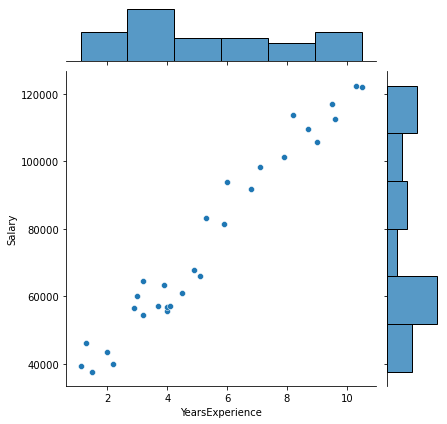

In [109]:
sns.jointplot(x='YearsExperience', y='Salary', data=data, kind = 'scatter')

In [110]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

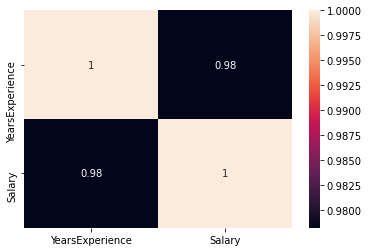

In [111]:
plt.figure()
sns.heatmap(data.corr(),annot=True)

# 3.Data Preparation

 1.Splitting into train and test
 
 2.Rescaling the variavles(Normalisation and Standardisation)

In [112]:

# Train test split

from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, train_size=0.7, \
                                                    random_state=0)

print(data_train.shape)
print(data_test.shape)

(21, 2)
(9, 2)


In [113]:
data_train.head()

,YearsExperience,Salary
22,7.9,101302.0
5,2.9,56642.0
16,5.1,66029.0
8,3.2,64445.0
14,4.5,61111.0


In [114]:

from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['YearsExperience', 'Salary']

norm_train_data = rescale.fit_transform(data_train.loc[:,num_features])

print(norm_train_data.shape, type(norm_train_data))

(21, 2) <class 'numpy.ndarray'>


In [115]:
data_train = pd.DataFrame(norm_train_data,columns=num_features)

data_train.head()

,YearsExperience,Salary
0,0.723404,0.750754
1,0.191489,0.209611
2,0.425532,0.323353
3,0.223404,0.304160
4,0.361702,0.263762


In [116]:
data_train.describe()

,YearsExperience,Salary
count,21.000000,21.000000
mean,0.402229,0.401330
std,0.279093,0.306511
min,0.000000,0.000000
25%,0.202128,0.209611
50%,0.361702,0.304160
75%,0.606383,0.661549
max,1.000000,1.000000


# 4.Training

In [117]:
data_train.head()

,YearsExperience,Salary
0,0.723404,0.750754
1,0.191489,0.209611
2,0.425532,0.323353
3,0.223404,0.304160
4,0.361702,0.263762


In [118]:
y_train = data_train.pop('Salary')
X_train = data_train

In [119]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [120]:

print('y intercept: ',regressor.intercept_)

y intercept:  -0.02749725846659168


In [121]:
print('slope: ',regressor.coef_)

slope:  [1.06612774]


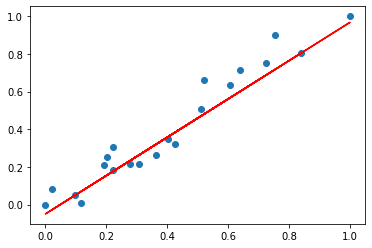

In [122]:
plt.scatter(X_train, y_train)

plt.plot(X_train, -0.04950975977223304 + 1.016505 * X_train, 'r')

plt.show()

# 5.Residual Analysis on Training data

In [123]:
y_train_pred = regressor.predict(X_train)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

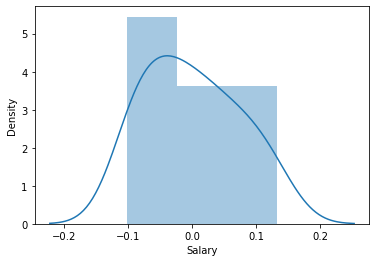

In [124]:
residual = y_train - y_train_pred

sns.distplot(residual)

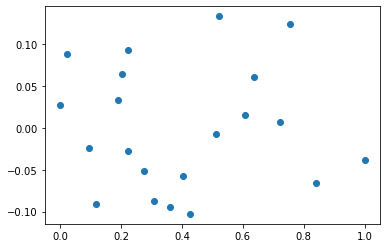

In [125]:
plt.scatter(X_train,residual)

plt.show()


# 6.Making Predictions

In [126]:

num_features = ['YearsExperience', 'Salary']

norm_test_data = rescale.transform(data_test.loc[:,num_features])

print(norm_test_data.shape, type(norm_test_data))

(9, 2) <class 'numpy.ndarray'>


In [70]:

data_test = pd.DataFrame(norm_test_data, columns = num_features)

data_test.head()

,YearsExperience,Salary
0,0.042553,-0.019533
1,0.978723,1.006289
2,0.319149,0.214931
3,0.297872,0.289292
4,0.893617,0.940591


In [72]:
y_test = data_test.pop('Salary')
X_test = data_test

In [74]:
y_test_pred = regressor.predict(X_test)

In [75]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
0,-0.019533,0.017870
1,1.006289,1.015947
2,0.214931,0.312756
3,0.289292,0.290073
4,0.940591,0.925213
5,0.849253,0.834478
6,0.888076,0.936554
7,0.199336,0.301414
8,0.530056,0.448858


# 7.Evaluating Algorithm

### Why metrics?

1.Metrics helps the performance of machine learning algorithmc

2.Metrics helps to select the best algorithm

3.It helps to understand the various characteristics in results

4.This is the way to evaluate the algorithm

In [76]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.04528611593353731
Mean Squared Error:  0.0034312077261660404
Root Mean Squared Error:  0.05857651172753496


MSE: MSE is much like MAE in sense thet it provides a rough idea of the magnitude of error

MAE:MAE is the sum of absolute differnce between prediction and actual values 

RMSE: If we take the square root if MSE we get RMSE. RMSE converts unit baack to the original units of output variable

In [ ]:
print(metrics.r2_score(y_test, y_test_pred))

rsquare:Measures the how well observed values are fitted to the regression line

# Building the model using statistics

In [78]:
import statsmodels.api as sm

In [79]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [80]:

lr.params

const             -0.027497
YearsExperience    1.066128
dtype: float64

In [81]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     310.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           3.12e-13
Time:                        21:59:41   Log-Likelihood:                 25.513
No. Observations:                  21   AIC:                            -47.03
Df Residuals:                      19   BIC:                            -44.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0275      0.029     

# Residual Analysis

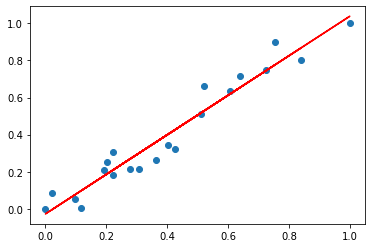

In [90]:
plt.scatter(X_train, y_train)

plt.plot(X_train,   -0.027497 +  1.066128 * X_train, 'r')

plt.show()

In [91]:
y_train_pred = regressor.predict(X_train)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

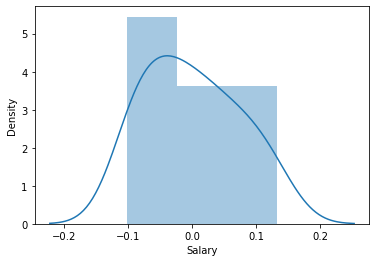

In [92]:
residual = y_train - y_train_pred

sns.distplot(residual)

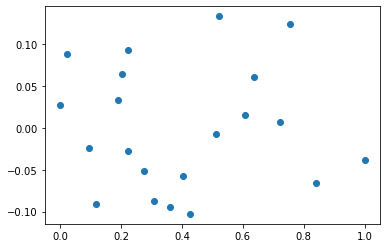

In [93]:
plt.scatter(X_train,residual)

plt.show()


# Making Predictions

In [127]:
num_features = ['YearsExperience', 'Salary']

norm_test_data = rescale.transform(data_test.loc[:,num_features])

print(norm_test_data.shape, type(norm_test_data))

(9, 2) <class 'numpy.ndarray'>


In [128]:

data_test = pd.DataFrame(norm_test_data, columns = num_features)

data_test.head()

,YearsExperience,Salary
0,0.042553,-0.019533
1,0.978723,1.006289
2,0.319149,0.214931
3,0.297872,0.289292
4,0.893617,0.940591


In [130]:
y_test = data_test.pop('Salary')
X_test = data_test

In [131]:
y_test_pred = regressor.predict(X_test)

In [132]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
0,-0.019533,0.017870
1,1.006289,1.015947
2,0.214931,0.312756
3,0.289292,0.290073
4,0.940591,0.925213
5,0.849253,0.834478
6,0.888076,0.936554
7,0.199336,0.301414
8,0.530056,0.448858


# Evaluating Algorithm

In [133]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.04528611593353731
Mean Squared Error:  0.0034312077261660404
Root Mean Squared Error:  0.05857651172753496


In [134]:
print(metrics.r2_score(y_test, y_test_pred))

0.974099340721351
